In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install opencv-python

In [3]:
import os
import seaborn as s
import matplotlib.pyplot as plt
import cv2

In [4]:
file_path = "../input/hpa-single-cell-image-classification/"
train_df = pd.read_csv(file_path+'train.csv')
train_df.head()

ID  Label
0  5c27f04c-bb99-11e8-b2b9-ac1f6b6435d0  8|5|0
1  5fb643ee-bb99-11e8-b2b9-ac1f6b6435d0   14|0
2  60b57878-bb99-11e8-b2b9-ac1f6b6435d0    6|1
3  5c1a898e-bb99-11e8-b2b9-ac1f6b6435d0  16|10
4  5b931256-bb99-11e8-b2b9-ac1f6b6435d0   14|0

In [5]:
train_df.ID.loc[0]

'5c27f04c-bb99-11e8-b2b9-ac1f6b6435d0'

In [6]:
files = os.listdir(file_path+'train/')
# for file in files:
#     print(file)

In [7]:
labels = ["nucleoplasm", "nuclear_membrane", "nucleoli", "nucleoli_fibrillar_center", "nuclear_speckles", "nuclear_bodies", "endoplasmic_reticulum", "golgi_apparatus", "intermediate_filaments", "actin_filaments", "microtubules", "mitotic Spindle", "centrosome", "plasma_membrane", "mitochondria", "aggresome", "cytosol", "vesicles", "negative"]
tag = []
for i in range(len(labels)):
    tag.append(str(i)+': '+labels[i])
tag

['0: nucleoplasm',
 '1: nuclear_membrane',
 '2: nucleoli',
 '3: nucleoli_fibrillar_center',
 '4: nuclear_speckles',
 '5: nuclear_bodies',
 '6: endoplasmic_reticulum',
 '7: golgi_apparatus',
 '8: intermediate_filaments',
 '9: actin_filaments',
 '10: microtubules',
 '11: mitotic Spindle',
 '12: centrosome',
 '13: plasma_membrane',
 '14: mitochondria',
 '15: aggresome',
 '16: cytosol',
 '17: vesicles',
 '18: negative']

Text(0, 0.5, 'Number of Images')

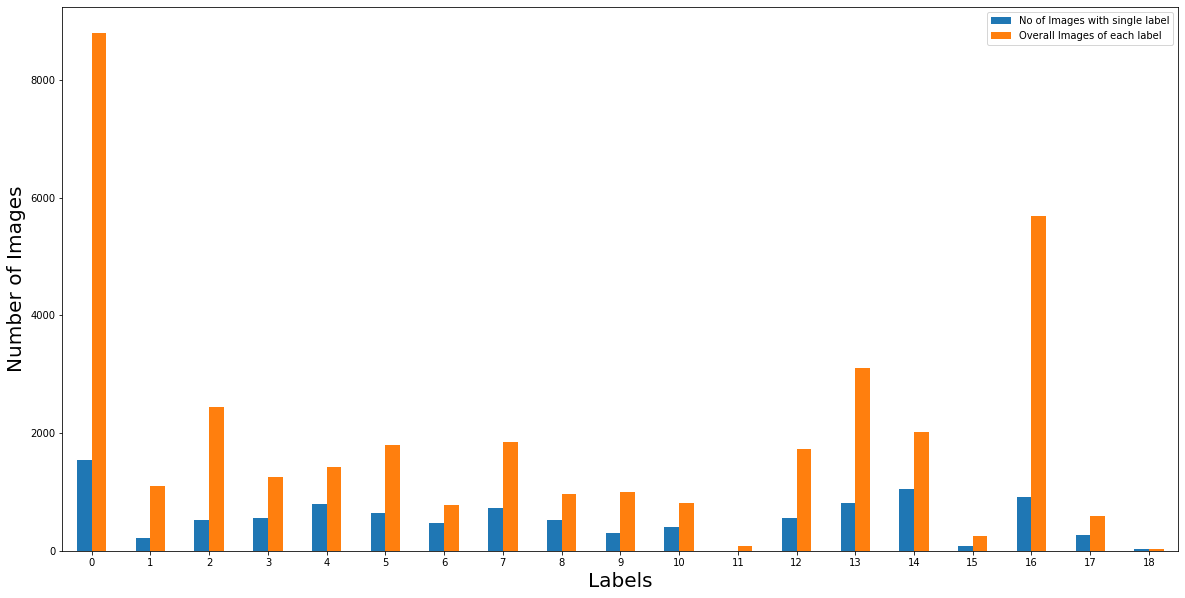

In [8]:
n = []
for i in range(len(labels)):
    n.append(str(i))
# finding no of images which has only one label
one = []
for i in n:
    one.append(len(train_df[train_df.Label == i]))
# finding overall images of each label
overall = []
for i in n:
    count = 0
    for label in train_df['Label']:
        if i in label.split('|'): #splitting labels in each row
            count = count + 1
    overall.append(count)
df = pd.DataFrame({'No of Images with single label':one, 'Overall Images of each label':overall}, index = n)
ax = df.plot.bar(figsize=(20,10),rot=0)
ax.set_xlabel("Labels",fontsize='20')
ax.set_ylabel("Number of Images", fontsize='20')

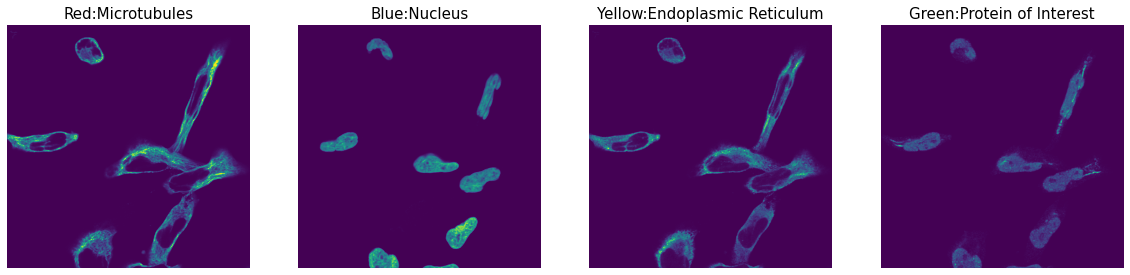

In [9]:
# visulaization of each channel
channel_names = ['Red:Microtubules','Blue:Nucleus','Yellow:Endoplasmic Reticulum','Green:Protein of Interest']
#spliting training images into each channel
micro = []
nucl = []
er = []
pI = []
channels = [micro,nucl,er,pI]
for i in train_df.ID.values:
    micro.append(file_path+'train/'+(i+'_red.png'))
    nucl.append(file_path+'train/'+(i+'_blue.png'))
    er.append(file_path+'train/'+(i+'_yellow.png'))
    pI.append(file_path+'train/'+(i+'_green.png'))

#setting for plotting
fig, ax = plt.subplots(1,4, figsize=(20,12))
for i in range(4):
    ax[i].imshow(plt.imread(channels[i][0]))
    ax[i].set_title(channel_names[i], fontsize='15')
    ax[i].axis('off')
plt.show()

In [10]:
# blending images
# Blend 1 (Red, Green, Blue) and Blend 2 (Yellow, Blue, Red)
blend1 = [0]*3
blend2 = [0]*3
for i in range(3):
    r = plt.imread(micro[i])
    g = plt.imread(pI[i])
    b = plt.imread(nucl[i])
    y = plt.imread(er[i])
    blend1[i] = np.dstack((r,g,b))
    blend2[i] = np.dstack((y,b,r))


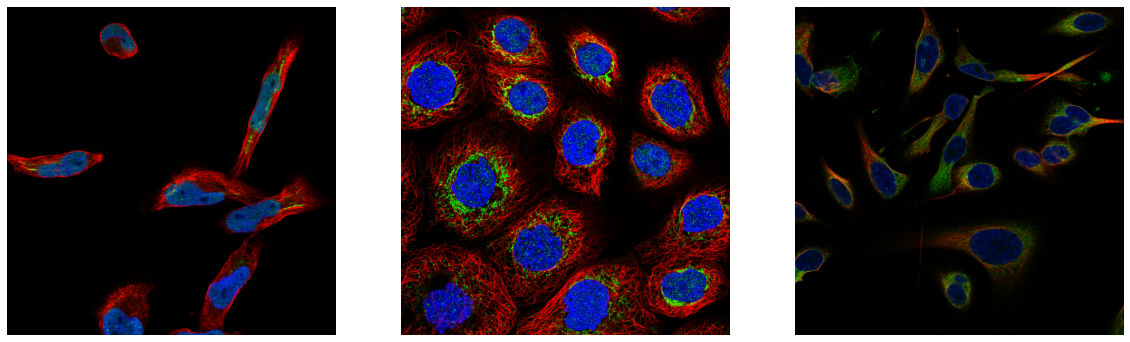

In [11]:
# plotting Blend1
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(20,50))
ax1.imshow(blend1[0])
ax1.axis('off')
ax2.imshow(blend1[1])
ax2.axis('off')
ax3.imshow(blend1[2])
ax3.axis('off')
plt.show()

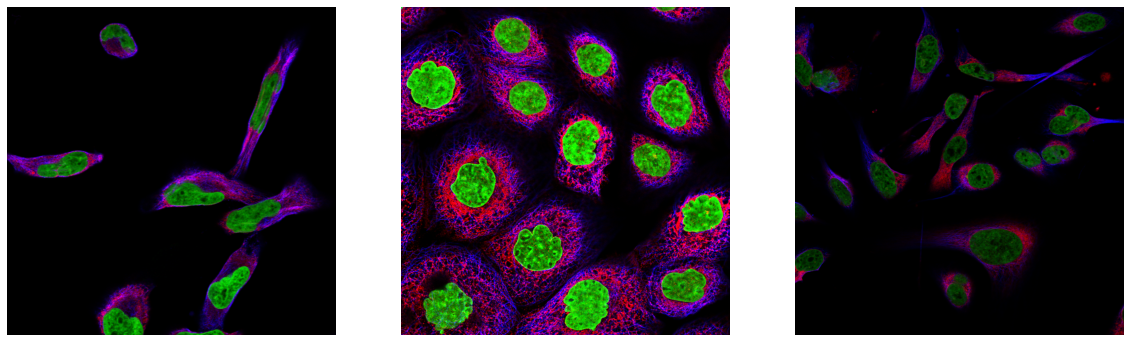

In [12]:
# plotting Blend2
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(20,50))
ax1.imshow(blend2[0])
ax1.axis('off')
ax2.imshow(blend2[1])
ax2.axis('off')
ax3.imshow(blend2[2])
ax3.axis('off')
plt.show()

In [13]:
train_df.reset_index(drop=True)

ID  Label
0      5c27f04c-bb99-11e8-b2b9-ac1f6b6435d0  8|5|0
1      5fb643ee-bb99-11e8-b2b9-ac1f6b6435d0   14|0
2      60b57878-bb99-11e8-b2b9-ac1f6b6435d0    6|1
3      5c1a898e-bb99-11e8-b2b9-ac1f6b6435d0  16|10
4      5b931256-bb99-11e8-b2b9-ac1f6b6435d0   14|0
...                                     ...    ...
21801  dd0989c4-bbca-11e8-b2bc-ac1f6b6435d0     14
21802  dd1f7fb8-bbca-11e8-b2bc-ac1f6b6435d0    3|0
21803  dd5cb36a-bbca-11e8-b2bc-ac1f6b6435d0   14|0
21804  df573730-bbca-11e8-b2bc-ac1f6b6435d0     14
21805  dea19dc6-bbca-11e8-b2bc-ac1f6b6435d0    5|0

[21806 rows x 2 columns]

In [14]:
train_df

ID  Label
0      5c27f04c-bb99-11e8-b2b9-ac1f6b6435d0  8|5|0
1      5fb643ee-bb99-11e8-b2b9-ac1f6b6435d0   14|0
2      60b57878-bb99-11e8-b2b9-ac1f6b6435d0    6|1
3      5c1a898e-bb99-11e8-b2b9-ac1f6b6435d0  16|10
4      5b931256-bb99-11e8-b2b9-ac1f6b6435d0   14|0
...                                     ...    ...
21801  dd0989c4-bbca-11e8-b2bc-ac1f6b6435d0     14
21802  dd1f7fb8-bbca-11e8-b2bc-ac1f6b6435d0    3|0
21803  dd5cb36a-bbca-11e8-b2bc-ac1f6b6435d0   14|0
21804  df573730-bbca-11e8-b2bc-ac1f6b6435d0     14
21805  dea19dc6-bbca-11e8-b2bc-ac1f6b6435d0    5|0

[21806 rows x 2 columns]

In [15]:
train_df[train_df.Label == '11'].reset_index(drop=True)

ID Label
0  b6a469d8-bbad-11e8-b2ba-ac1f6b6435d0    11

In [16]:
train_df[train_df.Label == '0'].reset_index(drop=True).ID.loc[0]

'5e22a522-bb99-11e8-b2b9-ac1f6b6435d0'

In [17]:
train_df[train_df.Label == '0'].reset_index(drop=True).ID.loc[0]+'_blue.png'

'5e22a522-bb99-11e8-b2b9-ac1f6b6435d0_blue.png'

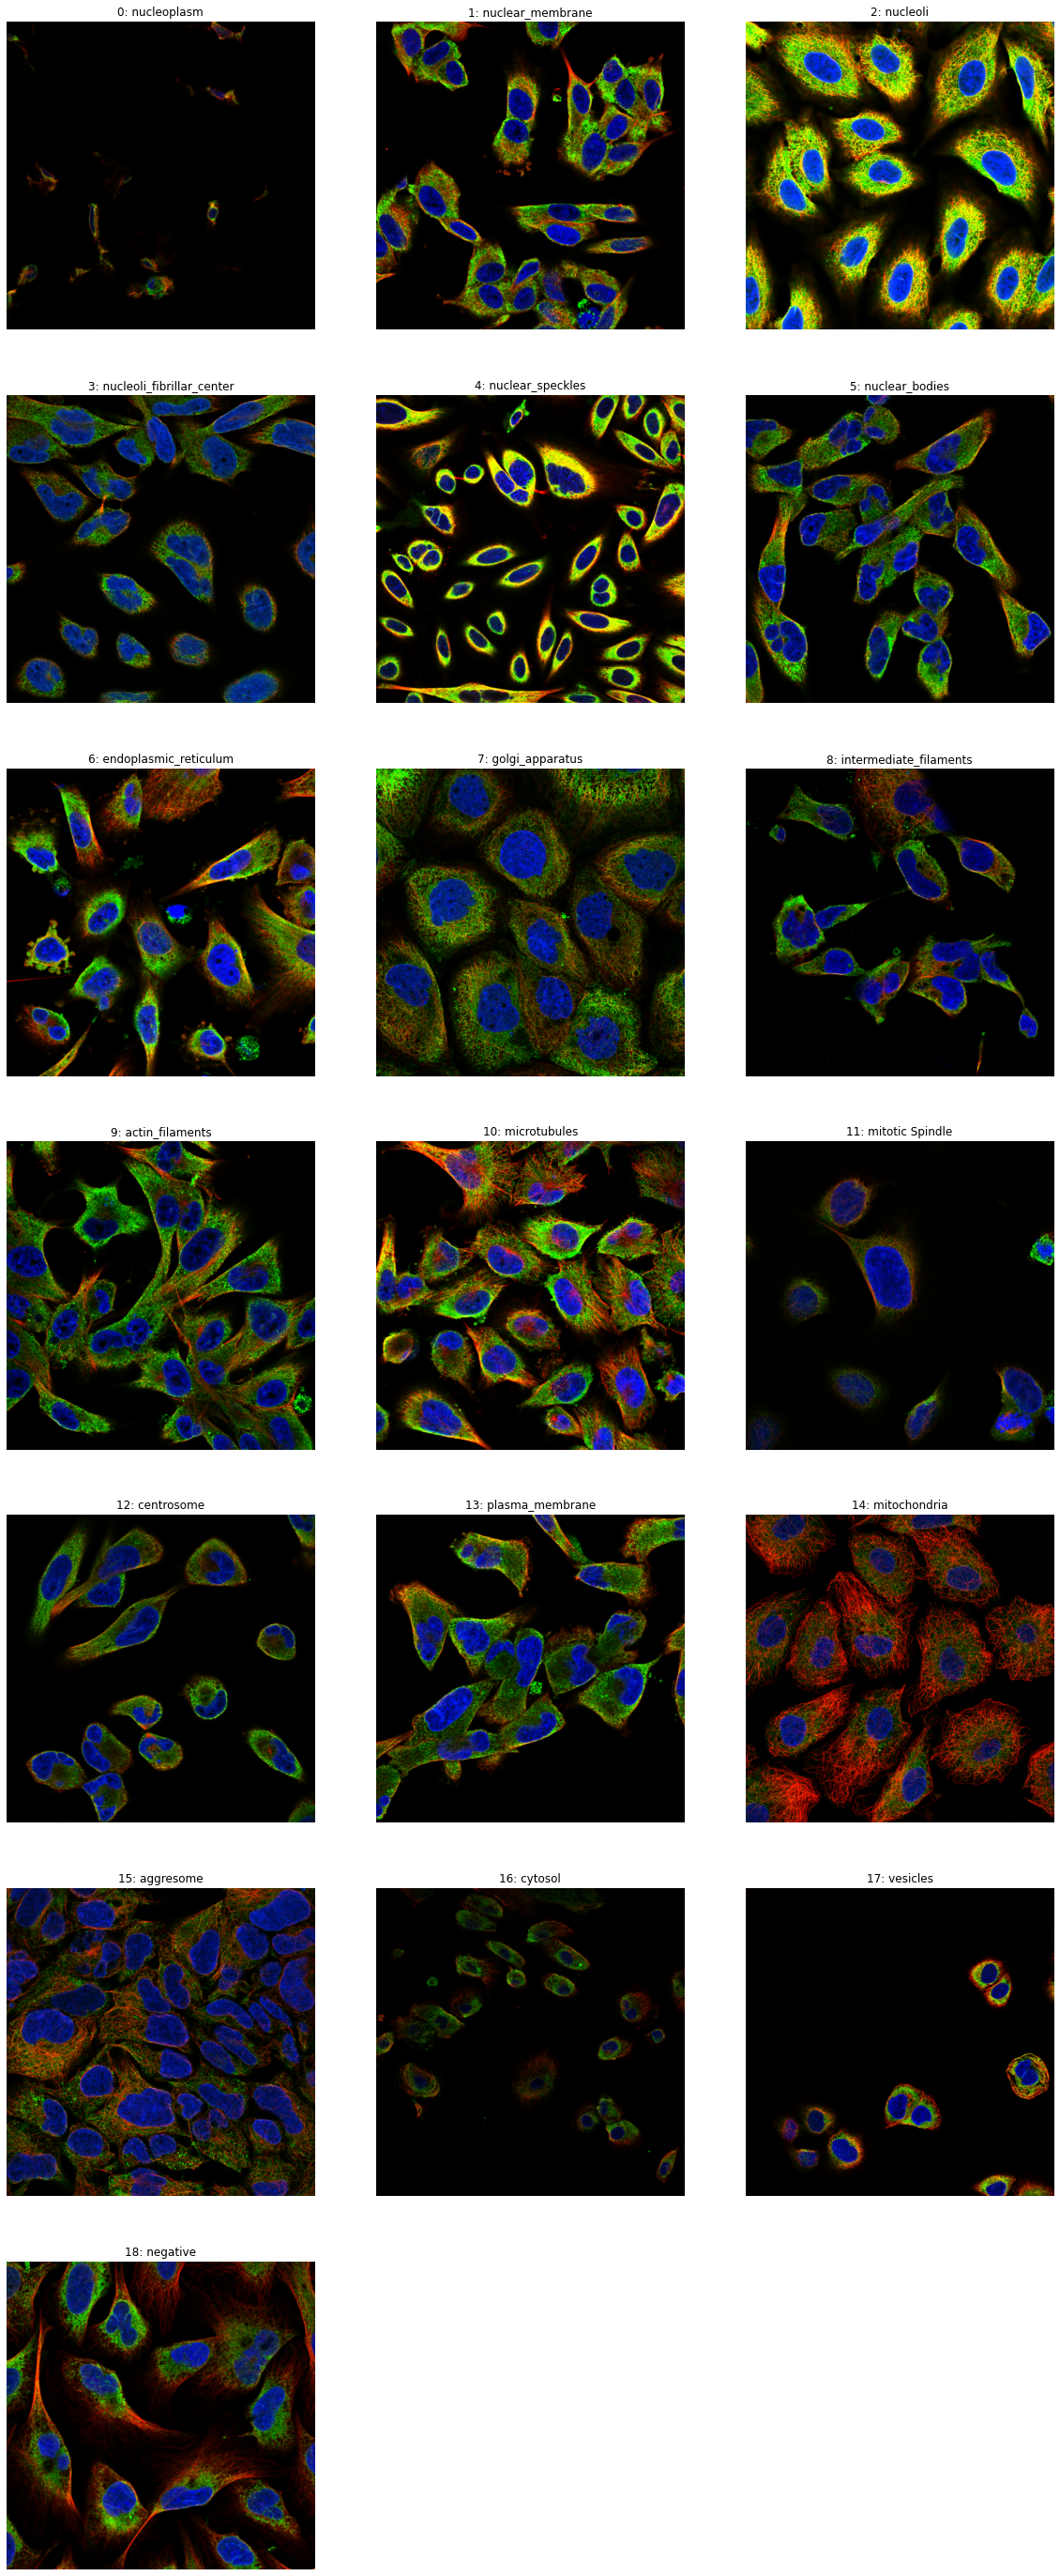

In [18]:
# visualization of each label
red = []
blue = []
yellow = []
for l in n:
    r = train_df[train_df.Label == l].reset_index(drop=True).ID.loc[0] + '_red.png'
    y = train_df[train_df.Label == l].reset_index(drop=True).ID.loc[0] + '_yellow.png'
    b = train_df[train_df.Label == l].reset_index(drop=True).ID.loc[0] + '_blue.png'
    red.append(r)
    blue.append(b)
    yellow.append(y)
# finding these images in train images and stack them
label_images = [0]*(len(red))
for i in range(len(red)):
    red_img = plt.imread(file_path + 'train/'+ red[i])
    yellow_img = plt.imread(file_path + 'train/'+ yellow[i])
    blue_img = plt.imread(file_path + 'train/'+ blue[i])
    stack_img = np.dstack((red_img,yellow_img,blue_img))
    label_images[i] = stack_img
    
fig = plt.figure(figsize=(20, 50))

fig.add_subplot(7, 3, 1)
plt.imshow(label_images[0])
plt.axis('off')
plt.title(tag[0])

fig.add_subplot(7, 3, 2)
plt.imshow(label_images[1])
plt.axis('off')
plt.title(tag[1])

fig.add_subplot(7, 3, 3)
plt.imshow(label_images[2])
plt.axis('off')
plt.title(tag[2])

fig.add_subplot(7, 3, 4)
plt.imshow(label_images[3])
plt.axis('off')
plt.title(tag[3])

fig.add_subplot(7, 3, 5)
plt.imshow(label_images[4])
plt.axis('off')
plt.title(tag[4])

fig.add_subplot(7, 3, 6)
plt.imshow(label_images[5])
plt.axis('off')
plt.title(tag[5])

fig.add_subplot(7, 3, 7)
plt.imshow(label_images[6])
plt.axis('off')
plt.title(tag[6])

fig.add_subplot(7, 3, 8)
plt.imshow(label_images[7])
plt.axis('off')
plt.title(tag[7])

fig.add_subplot(7, 3, 9)
plt.imshow(label_images[8])
plt.axis('off')
plt.title(tag[8])

fig.add_subplot(7, 3, 10)
plt.imshow(label_images[9])
plt.axis('off')
plt.title(tag[9])

fig.add_subplot(7, 3, 11)
plt.imshow(label_images[10])
plt.axis('off')
plt.title(tag[10])

fig.add_subplot(7, 3, 12)
plt.imshow(label_images[11])
plt.axis('off')
plt.title(tag[11])

fig.add_subplot(7, 3, 13)
plt.imshow(label_images[12])
plt.axis('off')
plt.title(tag[12])

fig.add_subplot(7, 3, 14)
plt.imshow(label_images[13])
plt.axis('off')
plt.title(tag[13])

fig.add_subplot(7, 3, 15)
plt.imshow(label_images[14])
plt.axis('off')
plt.title(tag[14])

fig.add_subplot(7, 3, 16)
plt.imshow(label_images[15])
plt.axis('off')
plt.title(tag[15])

fig.add_subplot(7, 3, 17)
plt.imshow(label_images[16])
plt.axis('off')
plt.title(tag[16])

fig.add_subplot(7, 3, 18)
plt.imshow(label_images[17])
plt.axis('off')
plt.title(tag[17])

fig.add_subplot(7, 3, 19)
plt.imshow(label_images[18])
plt.axis('off')
plt.title(tag[18])

fig.savefig('../working/full_figure.jpg')